In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch

In [2]:
sns.set_style("whitegrid")

In [35]:
def plot_model_comparison(paths: list[str], labels: list[str], title: str, subtitle: str = None):
    if len(paths) != len(labels):
        raise Exception("Did not provide an equal number of paths and labels!")

    fig, ax = plt.subplots(figsize=(10, 6))

    for idx, path in enumerate(paths):
        label = labels[idx]
        checkpoint = torch.load(path, map_location=torch.device("cpu"))

        train_epochs = np.arange(1, len(train_losses) + 1)
        train_losses = [loss[0].item() for loss in checkpoint["train_losses"]]

        val_epochs = np.arange(1, len(validation_losses) + 1)
        validation_losses = [loss[0] for loss in checkpoint["validation_losses"]]

        sns.lineplot(x=train_epochs, y=train_losses, label=f"Train {label}", color=f"C{idx}", ax=ax)
        sns.lineplot(x=val_epochs, y=validation_losses, label=f"Validation {label}", color=f"C{idx}", ax=ax)

    plt.title(title, pad=24, fontsize=16)
    if subtitle:
        plt.text(x=0.5, y=1.025, s=subtitle, fontsize=10, alpha=0.75, ha="center", va="bottom", transform=ax.transAxes)

    plt.xlabel("Training Epoch #")
    plt.ylabel("Mean Epoch Loss")
    plt.legend()
    plt.show()

# Prompting

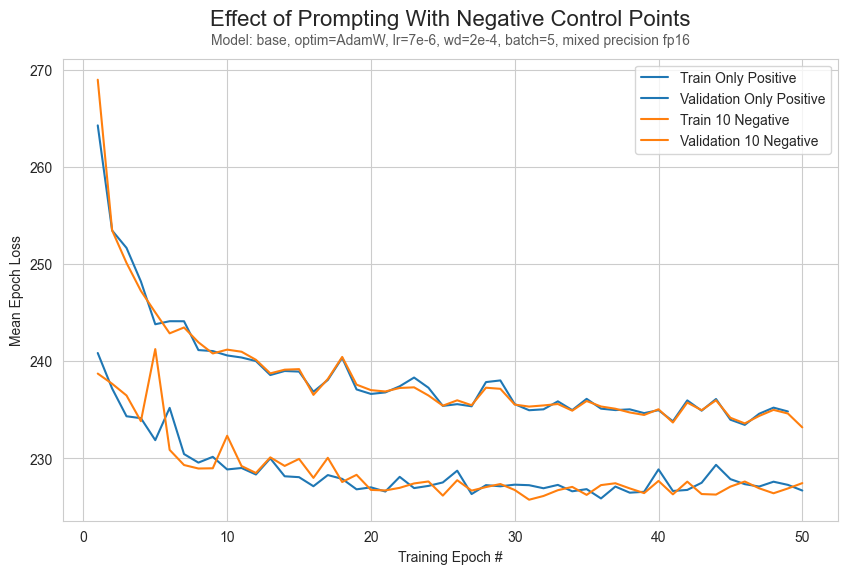

In [36]:
plot_model_comparison(
    [
        "./prompts/base_AdamW_lr=7e-06_wd=0.0002_bs=5_pts_mp=fp16_5p0n.pth",
        "./prompts/base_AdamW_lr=7e-06_wd=0.0002_bs=5_pts_mp=fp16_5p10n.pth",
    ],
    ["Only Positive", "10 Negative"],
    title="Effect of Prompting With Negative Control Points",
    subtitle="Model: base, optim=AdamW, lr=7e-6, wd=2e-4, batch=5, mixed precision fp16",
)

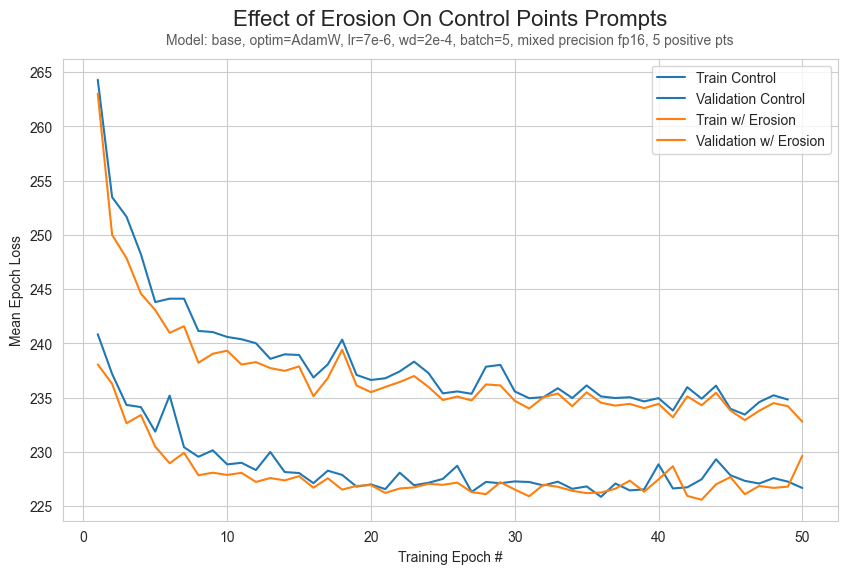

In [39]:
plot_model_comparison(
    [
        "./prompts/base_AdamW_lr=7e-06_wd=0.0002_bs=5_pts_mp=fp16_5p0n.pth",
        "./prompts/base_AdamW_lr=7e-06_wd=0.0002_bs=5_pts_mp=fp16_5p0n_erode.pth",
    ],
    ["Control", "w/ Erosion"],
    title="Effect of Erosion On Control Points Prompts",
    subtitle="Model: base, optim=AdamW, lr=7e-6, wd=2e-4, batch=5, mixed precision fp16, 5 positive pts",
)

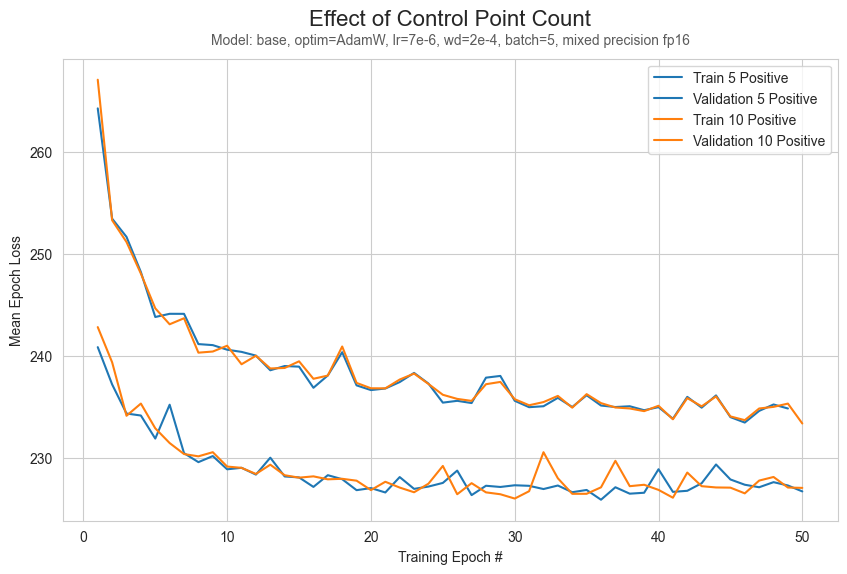

In [40]:
plot_model_comparison(
    [
        "./prompts/base_AdamW_lr=7e-06_wd=0.0002_bs=5_pts_mp=fp16_5p0n.pth",
        "./prompts/base_AdamW_lr=7e-06_wd=0.0002_bs=5_pts_mp=fp16_10p0n.pth",
    ],
    ["5 Positive", "10 Positive"],
    title="Effect of Control Point Count",
    subtitle="Model: base, optim=AdamW, lr=7e-6, wd=2e-4, batch=5, mixed precision fp16",
)